In [906]:
#importing necessary libraries
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from scipy.stats import norm, stats, zscore
import statistics as st
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import pickle



#import plotty
import warnings
warnings.filterwarnings('ignore')

In [907]:
# first do some work on Train data

In [908]:
df_x = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
df_x.head(5) # read the csv file of train data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [909]:
df_x.shape # check tyhe shape of the train dataset

(8523, 12)

In [910]:
df_x.describe() # check the missing values but it is showing only text column

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [911]:
df_x.info() # check the Dtype of the column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [912]:
df_x.all() #check the zero value

Item_Identifier               True
Item_Weight                   True
Item_Fat_Content              True
Item_Visibility              False
Item_Type                     True
Item_MRP                      True
Outlet_Identifier             True
Outlet_Establishment_Year     True
Outlet_Size                   True
Outlet_Location_Type          True
Outlet_Type                   True
Item_Outlet_Sales             True
dtype: bool

In [913]:
df_x.isna().sum() # check the null values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [914]:
df_x.dropna(inplace = True) # drop null values in our train dataset
df_x.shape #now our train dataset contains that rows and column

(4650, 12)

# Column1: Item_Identifier

In [915]:
df_x['Item_Identifier'].unique() #check the unique value 

array(['FDA15', 'DRC01', 'FDN15', ..., 'FDC28', 'FDV31', 'FDO03'],
      dtype=object)

In [916]:
df_x['Item_Identifier'].value_counts() #Count the particular value of every data in this column

FDN21    5
FDB15    5
NCK53    5
FDO58    5
FDI45    5
        ..
FDF17    1
NCU29    1
FDO03    1
FDK32    1
FDF50    1
Name: Item_Identifier, Length: 1535, dtype: int64

In [917]:
df_x['Item_Identifier'].isna().sum() #check the null values

0

In [918]:
df_x['Item_Identifier'].describe()  #describe the column to get more information like mean, std etc

count      4650
unique     1535
top       FDN21
freq          5
Name: Item_Identifier, dtype: object

In [1082]:
lab_enc = LabelEncoder() #use label encoder to convert object into integer

In [1083]:
df_identifier = lab_enc.fit_transform(df_x['Item_Identifier'])

In [1084]:
m = pd.Series(df_identifier)

In [1086]:
df_x['Item_Identifier'] = df_identifier #save the values in our column
df_x['Item_Identifier']

0        145
1          8
2        611
4       1180
5        697
        ... 
8515     410
8516    1232
8518     341
8520    1233
8522      45
Name: Item_Identifier, Length: 3720, dtype: int32

In [1087]:
df_x['Item_Identifier'].unique() #check the unique value

array([145,   8, 611, ..., 607, 234, 951])

In [1088]:
df_x['Item_Identifier'].value_counts() #check the number of counts

937     5
183     5
1250    5
1248    5
1142    5
       ..
960     1
847     1
990     1
833     1
1417    1
Name: Item_Identifier, Length: 1418, dtype: int64

<AxesSubplot:>

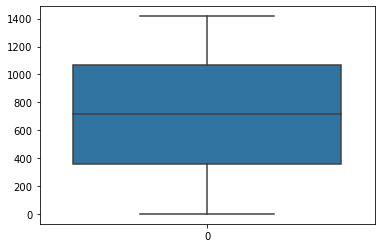

In [1089]:
sns.boxplot(data = df_x['Item_Identifier']) # visualize by using boxplot

<AxesSubplot:xlabel='Item_Identifier', ylabel='Density'>

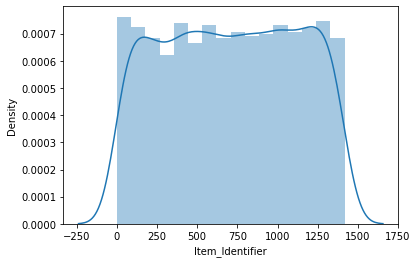

In [1090]:
sns.distplot(df_x['Item_Identifier']) #visualize by using distplot

In [1091]:
# calculate the mean, median, mode to check how much our column is skewed  
print('mean of the column-------> ',df_x['Item_Identifier'].mean())
print('median of the column--------> ',df_x['Item_Identifier'].median())
print('mode of the column--------> ', st.mode(df_x['Item_Identifier']))

mean of the column------->  709.3287634408603
median of the column-------->  713.0
mode of the column-------->  50


In [919]:
df_x.shape #check the shape of the dataset

(4650, 12)

# column2: Item_Weight

In [920]:
df_x['Item_Weight'].unique() #check the unique value of the column

array([ 9.3  ,  5.92 , 17.5  ,  8.93 , 10.395, 13.65 , 11.8  , 18.5  ,
       15.1  , 17.6  , 16.35 ,  9.   , 13.35 , 18.85 , 14.6  , 13.85 ,
        7.645, 11.65 , 18.6  , 18.7  , 10.   ,  8.85 ,  9.8  , 13.6  ,
       21.35 , 12.15 , 15.85 ,  7.39 , 10.195,  9.895,  7.905,  8.365,
       19.35 ,  8.645, 15.6  ,  7.825,  8.39 , 12.85 ,  7.76 , 16.75 ,
        6.055,  6.305, 20.85 ,  8.895, 19.7  ,  8.75 ,  8.31 , 19.75 ,
       17.1  , 10.5  , 14.15 , 13.3  ,  7.5  ,  7.485,  8.6  , 17.7  ,
        8.88 , 13.5  ,  7.855,  7.235,  8.02 , 16.6  , 14.   , 16.   ,
       21.25 ,  7.365, 18.35 ,  5.465,  5.905,  7.27 ,  6.155, 12.6  ,
       14.5  , 13.1  ,  5.75 , 11.35 ,  6.525, 10.3  ,  5.78 , 19.   ,
        5.26 ,  9.5  , 13.8  , 17.2  ,  6.32 ,  4.88 , 12.65 , 20.75 ,
        7.55 , 13.   , 12.3  , 14.1  , 12.   , 10.1  ,  7.785, 12.8  ,
        7.63 ,  7.975, 15.7  ,  8.985, 20.35 ,  6.59 , 19.85 , 16.85 ,
        6.26 , 20.25 ,  8.695,  7.075,  8.195,  7.09 ,  6.095,  6.15 ,
      

In [921]:
df_x['Item_Weight'].all() # check any zero value present in our column or not

True

In [922]:
df_x['Item_Weight'].isna().sum() # check the null value

0

In [923]:
df_x['Item_Weight'].value_counts() # check the number of count of particular value

12.150    58
17.600    55
13.650    49
11.800    49
16.000    45
          ..
4.905      1
9.035      1
7.890      1
6.400      1
5.000      1
Name: Item_Weight, Length: 409, dtype: int64

In [924]:
df_x['Item_Weight'].describe() # describe the column to get mean, std 

count    4650.000000
mean       12.898675
std         4.670973
min         4.555000
25%         8.770000
50%        12.650000
75%        17.000000
max        21.350000
Name: Item_Weight, dtype: float64

Text(0.5, 0, 'Item_weight')

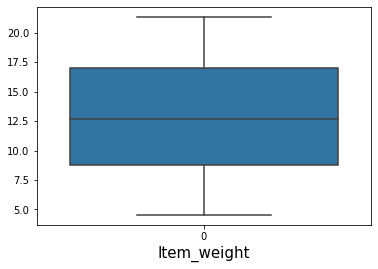

In [925]:
# Visualize using boxplot to check the outliers
sns.boxplot( data = df_x['Item_Weight'])
plt.xlabel('Item_weight', fontsize = 15)

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

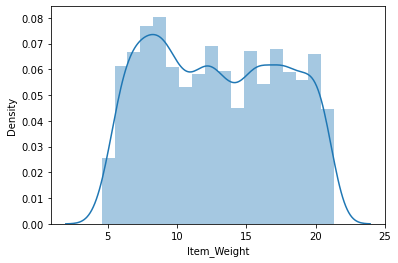

In [926]:
sns.distplot(df_x['Item_Weight']) #visualize it by using distplot

In [927]:
# calculate the mean, median, mode to check how much our column is skewed  
print('mean of the column-------> ',df_x['Item_Weight'].mean())
print('median of the column--------> ',df_x['Item_Weight'].median())
print('mode of the column--------> ', st.mode(df_x['Item_Weight']))

mean of the column------->  12.898675268816925
median of the column-------->  12.65
mode of the column-------->  12.15


<AxesSubplot:xlabel='Item_Weight', ylabel='Count'>

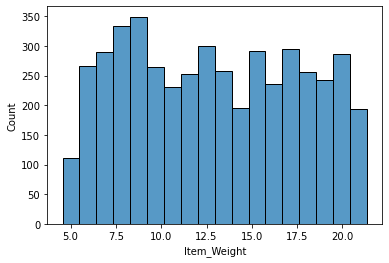

In [928]:
sns.histplot(df_x['Item_Weight']) # visualize it by using histogram

In [932]:
# now, we store this column into a and label into b, to find the relationship, column confidence and r2 score of this column.
a = df_x[['Item_Weight']]
b = df_x.Item_Outlet_Sales

In [933]:
lm1 = LinearRegression()

In [934]:
#split data into train and test.
a_train, a_test, b_train, b_test = train_test_split(a, b,test_size = 0.25, random_state=42)

In [935]:
lm1.fit(a_train,b_train) #we train the data

LinearRegression()

In [936]:
lm1.score(a_train,b_train) # Train score is very less here

0.00025520755532304484

In [939]:
lm1.score(a_test,b_test) # now, this is our column score or confidence

-0.0004730970369219989

In [940]:
print(lm1.intercept_) # check the intercept and coeficient value 
print(lm1.coef_)

2208.856989884554
[5.12760509]


In [941]:
a_new = pd.DataFrame({'Item_Weight': [9.3]}) # now, predict the value
a_new

,Item_Weight
0,9.3


In [942]:
lm1.predict(a_new) # Actual value of sales here is 3735 and it is showing 2256.54, 
#it means this column has less confidence and less accuracy with label and this is our first proof

array([2256.54371725])

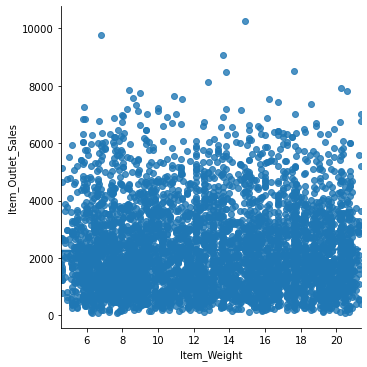

In [943]:
sns.lmplot(x = 'Item_Weight', y ='Item_Outlet_Sales', data = df_x) #visualize the column values by using linear regression plot

In [944]:
lm = smf.ols(formula = 'Item_Outlet_Sales~ Item_Weight', data = df_x).fit() #again, check for model confidence for second proof
lm.conf_int()

,0,1
Intercept,2100.151016,2353.152726
Item_Weight,-5.702760,12.740012


In [945]:
lm.pvalues #check the pvalues for hypothesis testing

Intercept      1.595749e-232
Item_Weight     4.544600e-01
dtype: float64

In [946]:
# Null Hypothesis is there is no relationship between item_weight and item_outlet_sales
# Alternate Hypothesis is vice versa of null hypothesis
# pvalue is greater than alpha value which is 0.05, so, we accept the null hypothesis.


In [947]:
(lm.rsquared)*100 #r2 value is very less, so, it means there is very less confidence between this column and label

0.012038098007183251

In [948]:
# finallyu, we decided to drop this column
df_x.drop(columns = 'Item_Weight', inplace = True)

In [949]:
df_x.shape #now, this is the shape of our dataset

(4650, 11)

# Column3: Item_Fat_Content

In [950]:
df_x['Item_Fat_Content'].unique() #check the unique value

array(['Low Fat', 'Regular', 'low fat', 'reg', 'LF'], dtype=object)

In [951]:
df_x['Item_Fat_Content'].describe() # analyize little bit more

count        4650
unique          5
top       Low Fat
freq         2774
Name: Item_Fat_Content, dtype: object

In [952]:
lab_enc = LabelEncoder() # use label encoder to convert this column into integer

In [953]:
df_fat = lab_enc.fit_transform(df_x['Item_Fat_Content'])
pd.Series(df_fat)

0       1
1       2
2       1
3       1
4       2
       ..
4645    4
4646    1
4647    1
4648    2
4649    1
Length: 4650, dtype: int32

In [954]:
df_x['Item_Fat_Content'] = df_fat # save it into our dataset column

In [955]:
df_x['Item_Fat_Content'].unique() # now, check the unique values interms of integers

array([1, 2, 3, 4, 0])

In [956]:
df_x['Item_Fat_Content'].value_counts() # check the number of counts assign

1    2774
2    1575
0     177
4      71
3      53
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:>

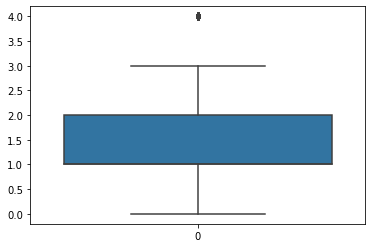

In [957]:
sns.boxplot(data= df_x['Item_Fat_Content']) # visualize it by using boxplot

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Density'>

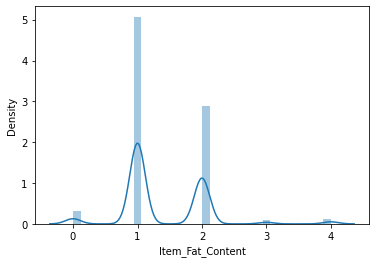

In [958]:
sns.distplot(df_x['Item_Fat_Content']) # visualize it by using distplot

In [959]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df_x['Item_Fat_Content'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df_x['Item_Fat_Content'], 75,
                   interpolation = 'midpoint')
iqr = q3 - q1

In [960]:
# higher side 
higher_side = df_x['Item_Fat_Content'] >= (q3+1.5*iqr)
print("Higher:\n", higher_side)
high = np.where(higher_side)
print(high)
 
# lower side 
lower_side = df_x['Item_Fat_Content'] <= (q1-1.5*iqr)
print("Lower:\n", lower_side)
low = np.where(lower_side)
print(low)
print("old Shape: ", df.shape)

Higher:
 0       False
1       False
2       False
4       False
5       False
        ...  
8517     True
8518    False
8520    False
8521    False
8522    False
Name: Item_Fat_Content, Length: 4650, dtype: bool
(array([  46,   82,  204,  319,  387,  402,  447,  477,  538,  593,  597,
        625,  640,  757,  802,  815,  820,  835,  861,  942,  952, 1133,
       1255, 1312, 1379, 1589, 1623, 1624, 1643, 1767, 1778, 1830, 1846,
       1905, 1921, 1964, 1976, 2326, 2407, 2418, 2560, 2661, 2773, 2777,
       2830, 2991, 3079, 3354, 3377, 3481, 3485, 3545, 3557, 3590, 3680,
       3731, 3833, 3904, 3933, 3994, 4092, 4114, 4199, 4214, 4220, 4234,
       4312, 4331, 4415, 4492, 4645], dtype=int64),)
Lower:
 0       False
1       False
2       False
4       False
5       False
        ...  
8517    False
8518    False
8520    False
8521    False
8522    False
Name: Item_Fat_Content, Length: 4650, dtype: bool
(array([], dtype=int64),)
old Shape:  (8523, 12)


In [961]:
#removing the outliers
df_x = df_x.drop(df_x.index[high])
 
print("New Shape: ", df_x.shape)

New Shape:  (4579, 11)


Text(0.5, 0, 'item_fat_content')

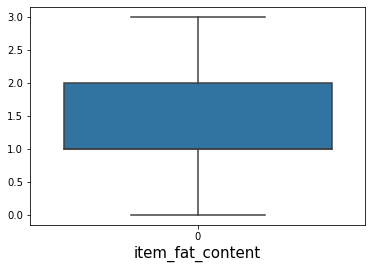

In [962]:
#visualize the outliers by using boxplot
sns.boxplot(data = df_x['Item_Fat_Content'])
plt.xlabel('item_fat_content', fontsize = 15)

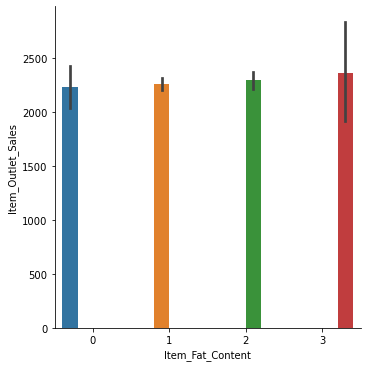

In [963]:
#visualize it by using categorical plot
sns.catplot(x = 'Item_Fat_Content', y = 'Item_Outlet_Sales', data = df_x, kind = 'bar', hue = "Item_Fat_Content" )

In [964]:
df_x.shape # shape of our dataset right now

(4579, 11)

# Column4: Item_Visibility

In [965]:
df_x['Item_Visibility'].unique() #check the unique value

array([0.0160473 , 0.01927822, 0.01676007, ..., 0.03518627, 0.14522065,
       0.04487828])

In [966]:
df_x['Item_Visibility'].all() # check if there is any zero value lies in our column or not

False

In [967]:
df_x['Item_Visibility'] = df_x['Item_Visibility'].replace(0,df_x['Item_Visibility'].mean()) # Replace the zero value by column mean

In [968]:
df_x['Item_Visibility'].all() # now check if there is still any zero value left in our column or not

True

In [969]:
df_x['Item_Visibility'].value_counts() #check the number of counts assign

0.060710    290
0.076975      3
0.040912      2
0.037734      2
0.059836      2
           ... 
0.114543      1
0.044607      1
0.026564      1
0.019457      1
0.137253      1
Name: Item_Visibility, Length: 4212, dtype: int64

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

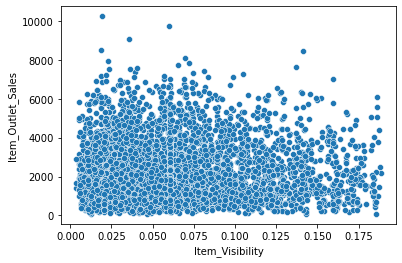

In [970]:
sns.scatterplot(x = 'Item_Visibility', y = 'Item_Outlet_Sales', data = df_x ) #visualize it by using scatterplot

<AxesSubplot:>

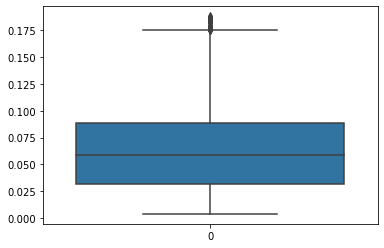

In [971]:
sns.boxplot(data = df_x['Item_Visibility'] ) #visualize it by using boxplot

In [972]:
#there are some outliers in our column, so, by using this method we are going to remove them.
q1 = np.percentile( df_x['Item_Visibility'], 25, interpolation = 'midpoint')
q1
q3 = np.percentile( df_x['Item_Visibility'], 68, interpolation = 'midpoint')
q3
iqr = q3-q1

In [973]:
# higher side 
higher_side = df_x['Item_Visibility'] >= (q3+1.5*iqr)
print("Higher: \n", higher_side)
print(np.where(higher_side))
high = np.where(higher_side)
 
# lower side 
lower_side = df_x['Item_Visibility'] <= (q1-1.5*iqr)
print("Lower: \n", lower_side)
low = np.where(lower_side)
print(np.where(lower_side))
print("old Shape: ", df.shape)

Higher: 
 0       False
1       False
2       False
4       False
5       False
        ...  
8516    False
8518    False
8520    False
8521     True
8522    False
Name: Item_Visibility, Length: 4579, dtype: bool
(array([  32,   36,   39,   42,   68,   79,   99,  110,  129,  143,  154,
        199,  200,  212,  221,  228,  234,  270,  310,  322,  326,  330,
        334,  342,  347,  352,  378,  396,  427,  428,  435,  453,  463,
        470,  478,  481,  486,  507,  515,  532,  545,  549,  586,  597,
        605,  611,  613,  631,  639,  641,  676,  680,  688,  712,  716,
        722,  738,  762,  775,  803,  828,  843,  849,  862,  894,  904,
        909,  917,  948,  961,  978,  995, 1018, 1113, 1114, 1136, 1148,
       1217, 1229, 1254, 1264, 1267, 1352, 1436, 1442, 1475, 1495, 1498,
       1502, 1519, 1568, 1581, 1586, 1603, 1612, 1653, 1656, 1691, 1692,
       1693, 1712, 1722, 1726, 1746, 1757, 1769, 1774, 1814, 1838, 1854,
       1858, 1876, 1890, 1892, 1927, 1936, 1937, 1943, 1

In [974]:
#removing the outliers
df_x = df_x.drop(df_x.index[high])
 
print("New Shape: ", df_x.shape)

New Shape:  (4287, 11)


<AxesSubplot:>

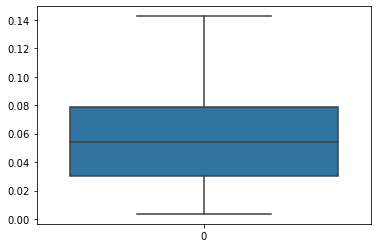

In [975]:
sns.boxplot(data = df_x['Item_Visibility'] ) #visualize it by using boxplot

In [976]:
#Find the mean, std, median and mode of the Column 'Item_Visibility'
Item_Visibility_mean = df_x.Item_Visibility.mean()
print('Mean of the Column "Item_Visibility" is ------>',Item_Visibility_mean)
Item_Visibility_std = df_x.Item_Visibility.std()
print('Std of the Column "Item_Visibility" is ------>', Item_Visibility_std)
Item_Visibility_median = df_x.Item_Visibility.median()
print('Median of the Column "Item_Visibility" is ------>', Item_Visibility_median)
Item_Visibility_mode = st.mode(df_x['Item_Visibility'])
print('Mode of the Column "Item_Visibility" is ------->', Item_Visibility_mode)

Mean of the Column "Item_Visibility" is ------> 0.057892149091729544
Std of the Column "Item_Visibility" is ------> 0.034068067448378585
Median of the Column "Item_Visibility" is ------> 0.054474158
Mode of the Column "Item_Visibility" is -------> 0.06071049516291763


In [ ]:
#To get proper no9rmal distribution curve or bell curve, mean = median = mode.
#here, in our case, mean, median and mode is approximately similar to each other.

Text(0, 0.5, 'counts')

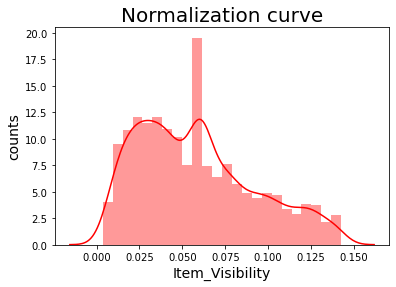

In [977]:
# using distplot for normalization curve
sns.distplot(df_x['Item_Visibility'], color='red', rug = False, hist = True, kde = True)
plt.title('Normalization curve', fontsize=20)
plt.xlabel('Item_Visibility', fontsize=14)
plt.ylabel('counts', fontsize=14)

In [978]:
df_x.shape #shape of our dataset now

(4287, 11)

# Column5: Item_Type

In [979]:
df_x['Item_Type'].unique() #check the unique value of the column

array(['Dairy', 'Soft Drinks', 'Meat', 'Household', 'Baking Goods',
       'Snack Foods', 'Fruits and Vegetables', 'Breakfast',
       'Health and Hygiene', 'Frozen Foods', 'Hard Drinks', 'Canned',
       'Starchy Foods', 'Breads', 'Others', 'Seafood'], dtype=object)

In [980]:
df_x['Item_Type'].value_counts() #check the number of counts assign to a particular value in our column

Snack Foods              607
Fruits and Vegetables    607
Household                462
Frozen Foods             443
Dairy                    346
Baking Goods             332
Canned                   325
Health and Hygiene       263
Soft Drinks              223
Meat                     194
Breads                   123
Hard Drinks              114
Others                    88
Starchy Foods             80
Breakfast                 50
Seafood                   30
Name: Item_Type, dtype: int64

In [981]:
lab_enc = LabelEncoder() #using labelencoder to convert object value into integer

In [982]:
df_type = lab_enc.fit_transform(df_x['Item_Type'])

In [983]:
pd.Series(df_type)

0        4
1       14
2       10
3        9
4        0
        ..
4282     0
4283    11
4284    13
4285     8
4286    14
Length: 4287, dtype: int32

In [984]:
df_x['Item_Type'] = df_type #save the value in our column
df_x.head(5)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,1,0.016047,4,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,2,0.019278,14,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,1,0.016760,10,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,1,0.060710,9,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,2,0.060710,0,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


Text(0.5, 0, 'Item_Type')

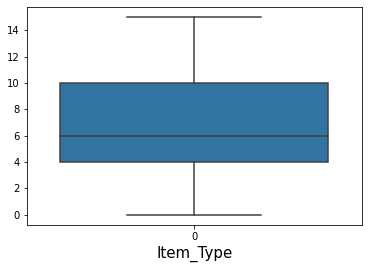

In [985]:
sns.boxplot(data = df_x['Item_Type'] ) #visualize it by using boxplot
plt.xlabel('Item_Type', fontsize = 15)

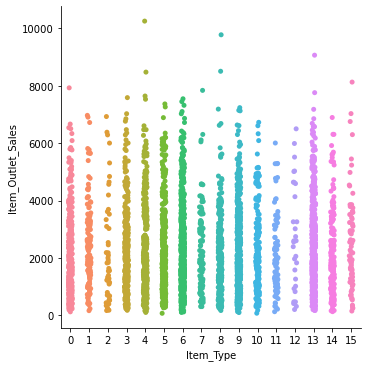

In [986]:
sns.catplot(x = 'Item_Type', y = 'Item_Outlet_Sales', data = df_x ) #visualize it by using catplot

Text(0.5, 0, 'Item_Type')

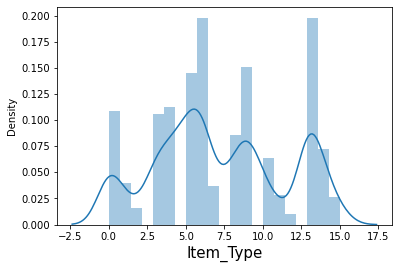

In [987]:
sns.distplot(df_x['Item_Type'] ) #visualize it by using distplot
plt.xlabel('Item_Type', fontsize = 15)

In [988]:
#Find the mean, std, median and mode of the Column 'Item_Type'
Item_Type_mean = df_x.Item_Type.mean()
print('Mean of the Column "Item_Type" is ------>',Item_Type_mean)
Item_Type_std = df_x.Item_Type.std()
print('Std of the Column "Item_Type" is ------>', Item_Type_std)
Item_Type_median = df_x.Item_Type.median()
print('Median of the Column "Item_Type" is ------>', Item_Type_median)
Item_Type_mode = st.mode(df_x['Item_Type'])
print('Mode of the Column "Item_Type" is ------->', Item_Type_mode)

Mean of the Column "Item_Type" is ------> 7.226498717051551
Std of the Column "Item_Type" is ------> 4.220173252745417
Median of the Column "Item_Type" is ------> 6.0
Mode of the Column "Item_Type" is -------> 13


In [989]:
df_x['Item_Type'].all() #check is there any zero lies in our column or not

False

In [990]:
df_x['Item_Type'] = df_x['Item_Type'].replace(0,df_x['Item_Type'].mean()) #replace that zero values by its column mean
df_x['Item_Type'].all()

True

In [991]:
#Find the mean, std, median and mode of the Column 'Item_Type'
#again check the mean, median, mode value 
Item_Type_mean = df_x.Item_Type.mean()
print('Mean of the Column "Item_Type" is ------>',Item_Type_mean)
Item_Type_std = df_x.Item_Type.std()
print('Std of the Column "Item_Type" is ------>', Item_Type_std)
Item_Type_median = df_x.Item_Type.median()
print('Median of the Column "Item_Type" is ------>', Item_Type_median)
Item_Type_mode = st.mode(df_x['Item_Type'])
print('Mode of the Column "Item_Type" is ------->', Item_Type_mode)

Mean of the Column "Item_Type" is ------> 7.786143590870378
Std of the Column "Item_Type" is ------> 3.6676109743634795
Median of the Column "Item_Type" is ------> 7.226498717051551
Mode of the Column "Item_Type" is -------> 13.0


In [992]:
df_x.shape #check the shape of our dataset now 

(4287, 11)

# Column6: Item_MRP

In [993]:
df_x['Item_MRP'].unique() #chekc the unique value

array([249.8092,  48.2692, 141.618 , ..., 214.5218,  85.1224,  75.467 ])

In [994]:
df_x['Item_MRP'].value_counts() #check the number of counts assign to a particular value

142.0154    6
100.1016    4
172.0422    4
89.8856     3
189.2530    3
           ..
93.6462     1
112.2886    1
186.4240    1
45.5744     1
47.0402     1
Name: Item_MRP, Length: 3556, dtype: int64

In [995]:
df_x['Item_MRP'].all() #check is there any zero value lies in our column or not

True

In [996]:
df_x['Item_MRP'].isna().sum() # check the null values in our column

0

In [998]:
df_x['Item_MRP'].describe() #describe our column to get more information like mean, std etc

count    4287.000000
mean      142.130159
std        62.313385
min        31.490000
25%        95.141000
50%       142.947000
75%       187.089800
max       266.888400
Name: Item_MRP, dtype: float64

<AxesSubplot:>

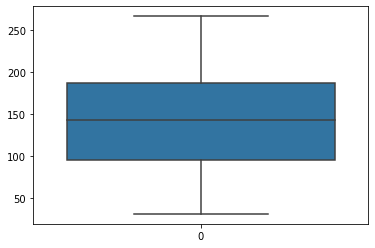

In [999]:
sns.boxplot(data = df_x['Item_MRP']) #visualize it by using boxplot

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

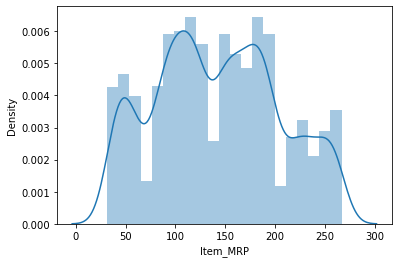

In [1000]:
sns.distplot(df_x['Item_MRP']) #visualize it by using distplot

In [1001]:
#Find the mean, std, median and mode of the Column 'Item_MRP'
Item_MRP_mean = df_x.Item_MRP.mean()
print('Mean of the Column "Item_MRP" is ------>', Item_MRP_mean)
Item_MRP_std = df_x.Item_MRP.std()
print('Std of the Column "Item_MRP" is ------>', Item_MRP_std)
Item_MRP_median = df_x.Item_MRP.median()
print('Median of the Column "Item_MRP" is ------>', Item_MRP_median)
Item_MRP_mode = st.mode(df_x['Item_MRP'])
print('Mode of the Column "Item_MRP" is ------->', Item_MRP_mode)

Mean of the Column "Item_MRP" is ------> 142.13015913226027
Std of the Column "Item_MRP" is ------> 62.313384743353815
Median of the Column "Item_MRP" is ------> 142.947
Mode of the Column "Item_MRP" is -------> 142.0154


In [1002]:
df_x.shape # now check the shape of our dataset now

(4287, 11)

# Column7: Outlet_Identifier

In [1003]:
df_x['Outlet_Identifier'].unique() #check the unique value in our dataset

array(['OUT049', 'OUT018', 'OUT013', 'OUT046', 'OUT035'], dtype=object)

In [ ]:
df_x['Outlet_Identifier'].describe() #describe our column to get more information like mean, std etc

In [1004]:
lab_enc = LabelEncoder() #Convert object into integer by using label encoder

In [1005]:
df_identifier = lab_enc.fit_transform(df_x['Outlet_Identifier'])
df_identifier

array([4, 1, 4, ..., 0, 2, 3])

In [1006]:
ab = pd.Series(df_identifier)

In [1007]:
df_x['Outlet_Identifier'] = ab #save it into our column

In [1008]:
df_x['Outlet_Identifier'].head(5) #check the column now

0    4.0
1    1.0
2    4.0
4    1.0
5    0.0
Name: Outlet_Identifier, dtype: float64

In [1009]:
df_x['Outlet_Identifier'].unique() # now, again check the unique value in our column or not

array([ 4.,  1.,  0.,  3.,  2., nan])

In [1010]:
df_x['Outlet_Identifier'].value_counts() #check the number of counts

2.0    443
1.0    440
0.0    436
3.0    434
4.0    428
Name: Outlet_Identifier, dtype: int64

In [1011]:
df_x['Outlet_Identifier'].isna().sum() # check the null values

2106

In [1013]:
#there are lot of null values in this column, so, we decided to drop this column
df_x.drop(columns = 'Outlet_Identifier', inplace = True) 

In [1014]:
df_x.head(5) #our required dataset

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,1,0.016047,4.000000,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,2,0.019278,14.000000,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,1,0.016760,10.000000,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,1,0.060710,9.000000,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,2,0.060710,7.226499,51.4008,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [1015]:
df_x.shape #check the shape of our dataset now

(4287, 10)

# Column8: Outlet_Establishment_Year

In [1016]:
df_x['Outlet_Establishment_Year'].unique() #check the unique value 

array([1999, 2009, 1987, 1997, 2004], dtype=int64)

In [1017]:
df_x['Outlet_Establishment_Year'].value_counts() #check the number of counts 

2004    864
1997    862
1987    860
1999    851
2009    850
Name: Outlet_Establishment_Year, dtype: int64

In [1018]:
df_x['Outlet_Establishment_Year'].all() #check the zero values

True

In [1019]:
df_x['Outlet_Establishment_Year'].isna().sum() #check the null values 

0

In [1020]:
df_x['Outlet_Establishment_Year'].describe() # #describe our column to get more information like mean, std etc

count    4287.000000
mean     1999.181012
std         7.384948
min      1987.000000
25%      1997.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

<AxesSubplot:>

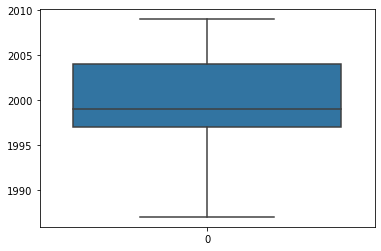

In [1021]:
sns.boxplot(data = df_x['Outlet_Establishment_Year']) #visualize it by using boxplot

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

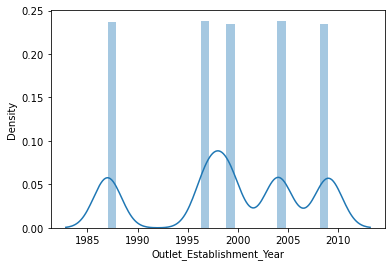

In [1022]:
sns.distplot(df_x['Outlet_Establishment_Year']) #visualize it by using distplot

In [1023]:
#Find the mean, std, median and mode of the Column 'Outlet_Size'
Outlet_Establishment_Year_mean = df_x.Outlet_Establishment_Year.mean()
print('Mean of the Column "Outlet_Establishment_Year" is ------>',Outlet_Establishment_Year_mean)
Outlet_Establishment_Year_std = df_x.Outlet_Establishment_Year.std()
print('Std of the Column "Outlet_Establishment_Year" is ------>', Outlet_Establishment_Year_std)
Outlet_Establishment_Year_median = df_x.Outlet_Establishment_Year.median()
print('Median of the Column "Outlet_Establishment_Year" is ------>', Outlet_Establishment_Year_median)
Outlet_Establishment_Year_mode = st.mode(df_x['Outlet_Establishment_Year'])
print('Mode of the Column "Outlet_Establishment_Year" is ------->', Outlet_Establishment_Year_mode)

Mean of the Column "Outlet_Establishment_Year" is ------> 1999.1810123629577
Std of the Column "Outlet_Establishment_Year" is ------> 7.38494790307361
Median of the Column "Outlet_Establishment_Year" is ------> 1999.0
Mode of the Column "Outlet_Establishment_Year" is -------> 2004


In [1024]:
df_x.shape #now, check the shape of our dataset

(4287, 10)

# Column9: Outlet_Size

In [1025]:
df_x['Outlet_Size'].unique() # check the unique value

array(['Medium', 'High', 'Small'], dtype=object)

In [1026]:
df_x['Outlet_Size'].value_counts() # check the number of counts

Small     1726
Medium    1701
High       860
Name: Outlet_Size, dtype: int64

In [1027]:
df_x['Outlet_Size'].describe() # describe the column to get more information about mean, std etc

count      4287
unique        3
top       Small
freq       1726
Name: Outlet_Size, dtype: object

In [1028]:
df_x['Outlet_Size'].isna().sum() #check the null values

0

In [1029]:
lab_enc = LabelEncoder() # now convert our column values into integers

In [1030]:
df_size = lab_enc.fit_transform(df_x['Outlet_Size']) 

In [1031]:
pd.Series(df_size)

0       1
1       1
2       1
3       0
4       1
       ..
4282    1
4283    1
4284    0
4285    2
4286    2
Length: 4287, dtype: int32

In [1032]:
df_x['Outlet_Size'] = df_size
df_x['Outlet_Size'].head() # save it into our column

0    1
1    1
2    1
4    0
5    1
Name: Outlet_Size, dtype: int32

In [1033]:
df_x['Outlet_Size'].unique() # now, again check the unique values

array([1, 0, 2])

<AxesSubplot:xlabel='Outlet_Size', ylabel='Density'>

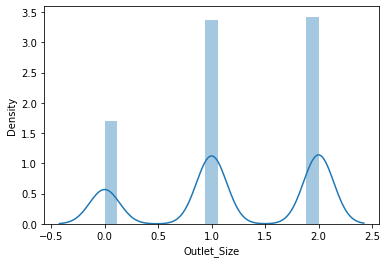

In [1034]:
sns.distplot(df_x['Outlet_Size']) #visualize it by using distplot

In [1035]:
df_x['Outlet_Size'].value_counts() # count the values

2    1726
1    1701
0     860
Name: Outlet_Size, dtype: int64

In [1036]:
df_x['Outlet_Size'].describe() # describe the column

count    4287.000000
mean        1.202006
std         0.750029
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: Outlet_Size, dtype: float64

In [1037]:
#Find the mean, std, median and mode of the Column 'Outlet_Size'
Outlet_Size_mean = df_x.Outlet_Size.mean()
print('Mean of the Column "Outlet_Size" is ------>',Outlet_Size_mean)
Outlet_Size_std = df_x.Outlet_Size.std()
print('Std of the Column "Outlet_Size" is ------>', Outlet_Size_std)
Outlet_Size_median = df_x.Outlet_Size.median()
print('Median of the Column "Outlet_Size" is ------>', Outlet_Size_median)
Outlet_Size_mode = st.mode(df_x['Outlet_Size'])
print('Mode of the Column "Outlet_Size" is ------->', Outlet_Size_mode)

Mean of the Column "Outlet_Size" is ------> 1.2020060648472124
Std of the Column "Outlet_Size" is ------> 0.7500292027045034
Median of the Column "Outlet_Size" is ------> 1.0
Mode of the Column "Outlet_Size" is -------> 2


In [1038]:
df_x.shape #now, check the shape of our column

(4287, 10)

# Column10: Outlet_Location_Type

In [1039]:
df_x['Outlet_Location_Type'].unique() # chekc the unique value

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [1040]:
df_x['Outlet_Location_Type'].value_counts() #check the number of counts

Tier 1    1713
Tier 3    1710
Tier 2     864
Name: Outlet_Location_Type, dtype: int64

In [1041]:
lab_enc = LabelEncoder() #use label encoder to convert object values into integer

In [1042]:
df_loc = lab_enc.fit_transform(df_x['Outlet_Location_Type'])

In [1043]:
pd.Series(df_loc)

0       0
1       2
2       0
3       2
4       2
       ..
4282    2
4283    2
4284    2
4285    1
4286    0
Length: 4287, dtype: int32

In [1045]:
df_x['Outlet_Location_Type'] = df_loc #save values into our column

In [1046]:
df_x['Outlet_Location_Type'].unique() # now, check the unique values

array([0, 2, 1])

In [1048]:
df_x['Outlet_Location_Type'].isna().sum()  # check the null values 

0

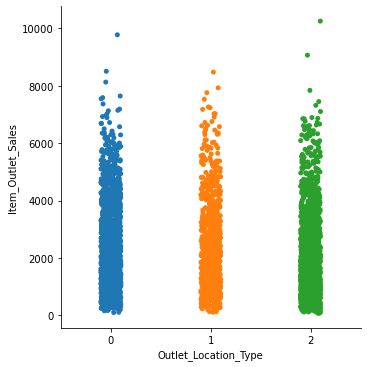

In [1049]:
sns.catplot(x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales', data = df_x ) #visualize it by using catplot

In [1050]:
df_x['Outlet_Location_Type'].value_counts() #check the number of counts

0    1713
2    1710
1     864
Name: Outlet_Location_Type, dtype: int64

In [1051]:
df_x.shape # now, check the shape of pur dataset

(4287, 10)

# Column11: Outlet_Type

In [1052]:
df_x['Outlet_Type'].unique() # check the unique values

array(['Supermarket Type1', 'Supermarket Type2'], dtype=object)

In [1053]:
lab_enc = LabelEncoder() #use label encoder to convert object into integer

In [1054]:
df_ot = lab_enc.fit_transform(df_x['Outlet_Type'])

In [1055]:
pd.Series(df_ot)

0       0
1       1
2       0
3       0
4       1
       ..
4282    1
4283    1
4284    0
4285    0
4286    0
Length: 4287, dtype: int32

In [1056]:
df_x['Outlet_Type'] = df_ot #save the values in our column

In [1057]:
df_x['Outlet_Type'].unique() #now, check the unique value

array([0, 1])

In [1058]:
df_x['Outlet_Type'].value_counts() #check the number of counts

0    3437
1     850
Name: Outlet_Type, dtype: int64

In [1060]:
df_x['Outlet_Type'].isna().sum() # check thye null values

0

In [1061]:
df_x.shape #now, check the shape of our dataset

(4287, 10)

# Label: Item_Outlet_Sales

In [1062]:
df_x['Item_Outlet_Sales'].unique() # check the unique values

array([3735.138 ,  443.4228, 2097.27  , ..., 2479.4392,  858.882 ,
       2778.3834])

In [1063]:
df_x['Item_Outlet_Sales'].value_counts() #check the number of counts

1438.1280    11
703.0848     10
1342.2528    10
958.7520      9
1416.8224     9
             ..
3195.8400     1
1050.6324     1
1443.4544     1
4681.9056     1
3653.9104     1
Name: Item_Outlet_Sales, Length: 2329, dtype: int64

In [1064]:
df_x['Item_Outlet_Sales'].all() #check the zero value in our column

True

In [1065]:
df_x['Item_Outlet_Sales'].isna().sum() # check the null values 

0

In [1066]:
df_x['Item_Outlet_Sales'].describe() # describe the column

count     4287.000000
mean      2284.947636
std       1502.251143
min         75.901200
25%       1133.857400
50%       1960.115200
75%       3121.936200
max      10256.649000
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:>

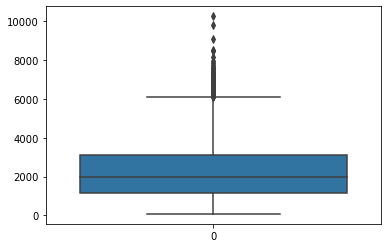

In [1067]:
sns.boxplot(data = df_x['Item_Outlet_Sales']) #visualize it by using boxplot

In [1068]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df_x['Item_Outlet_Sales'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df_x['Item_Outlet_Sales'], 70,
                   interpolation = 'midpoint')
iqr = q3 - q1

In [1069]:
# higher side 
higher_side = df_x['Item_Outlet_Sales'] >= (q3+1.5*iqr)
print("Higher:", higher_side)
print(np.where(higher_side))
high = np.where(higher_side)
 
# lower side 
lower_side = df_x['Item_Outlet_Sales'] <= (q1-1.5*iqr)
print("Lower:", lower_side)
low = np.where(lower_side)
print(np.where(lower_side))
print("old Shape: ", df_x.shape)

Higher: 0       False
1       False
2       False
4       False
5       False
        ...  
8515    False
8516    False
8518    False
8520    False
8522    False
Name: Item_Outlet_Sales, Length: 4287, dtype: bool
(array([  28,   33,   59,   71,   72,   97,  102,  130,  132,  136,  143,
        164,  176,  179,  191,  193,  201,  202,  203,  287,  309,  319,
        441,  513,  516,  578,  600,  603,  651,  688,  698,  723,  725,
        751,  771,  802,  804,  813,  815,  821,  853,  854,  893,  898,
        900,  908,  936,  947, 1002, 1020, 1033, 1037, 1131, 1143, 1252,
       1255, 1257, 1270, 1295, 1320, 1344, 1404, 1417, 1437, 1450, 1462,
       1464, 1487, 1528, 1553, 1555, 1558, 1560, 1586, 1596, 1625, 1645,
       1656, 1679, 1723, 1766, 1768, 1792, 1794, 1814, 1841, 1853, 1898,
       1903, 1969, 1970, 2031, 2105, 2108, 2134, 2182, 2189, 2202, 2205,
       2273, 2280, 2295, 2309, 2375, 2400, 2455, 2481, 2483, 2486, 2491,
       2498, 2519, 2537, 2572, 2675, 2681, 2695, 2711, 2

In [1070]:
#removing the outliers
df_x = df_x.drop(df_x.index[high])
df_x = df_x.drop(df_x.index[low])
 
print("New Shape: ", df_x.shape)

New Shape:  (4109, 10)


<AxesSubplot:>

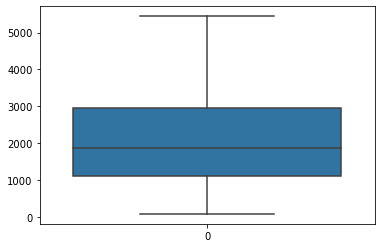

In [1071]:
sns.boxplot(data = df_x['Item_Outlet_Sales']) #visualize it by using boxplot

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

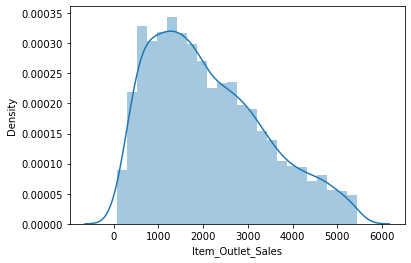

In [1072]:
sns.distplot(df_x['Item_Outlet_Sales']) #visualize it by using distplot

In [1073]:
#Find the mean, std, median and mode of the Column 'Item_Outlet_Sales'
Item_Outlet_Sales_mean = df_x.Item_Outlet_Sales.mean()
print('Mean of the Column "Item_Outlet_Sales" is ------>', Item_Outlet_Sales_mean)
Item_Outlet_Sales_std = df_x.Item_Outlet_Sales.std()
print('Std of the Column "Item_Outlet_Sales" is ------>', Item_Outlet_Sales_std)
Item_Outlet_Sales_median = df_x.Item_Outlet_Sales.median()
print('Median of the Column "Item_Outlet_Sales" is ------>', Item_Outlet_Sales_median)
Item_Outlet_Sales_mode = st.mode(df_x['Item_Outlet_Sales'])
print('Mode of the Column "Item_Outlet_Sales" is ------->', Item_Outlet_Sales_mode)

Mean of the Column "Item_Outlet_Sales" is ------> 2110.926920710631
Std of the Column "Item_Outlet_Sales" is ------> 1264.4316016928183
Median of the Column "Item_Outlet_Sales" is ------> 1877.556
Mode of the Column "Item_Outlet_Sales" is -------> 1438.128


In [ ]:
#To get proper normalization curve, mean= median=mode but in our column, all are different, 
#so, to get proper curve, we shrink our range to eliminate more outliers

In [1075]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df_x['Item_Outlet_Sales'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df_x['Item_Outlet_Sales'], 60,
                   interpolation = 'midpoint')
iqr = q3 - q1

In [1076]:
# higher side 
higher_side = df_x['Item_Outlet_Sales'] >= (q3+1.5*iqr)
print("Higher:", higher_side)
print(np.where(higher_side))
high = np.where(higher_side)
 
# lower side 
lower_side = df_x['Item_Outlet_Sales'] <= (q1-1.5*iqr)
print("Lower:", lower_side)
low = np.where(lower_side)
print(np.where(lower_side))
print("old Shape: ", df_x.shape)

Higher: 0       False
1       False
2       False
4       False
5       False
        ...  
8515    False
8516    False
8518    False
8520    False
8522    False
Name: Item_Outlet_Sales, Length: 4109, dtype: bool
(array([  17,   34,   40,   88,   93,  114,  140,  146,  155,  162,  168,
        181,  185,  187,  205,  222,  226,  231,  247,  256,  287,  297,
        313,  314,  315,  335,  337,  350,  354,  360,  368,  385,  386,
        387,  400,  409,  423,  435,  459,  473,  489,  493,  509,  523,
        533,  586,  591,  614,  619,  623,  644,  661,  669,  672,  677,
        679,  682,  687,  688,  703,  721,  727,  733,  742,  745,  757,
        766,  790,  791,  815,  826,  832,  849,  855,  878,  889,  909,
        915,  918,  920,  930,  944,  960,  972,  986,  994, 1009, 1017,
       1026, 1030, 1033, 1041, 1053, 1060, 1073, 1075, 1084, 1110, 1116,
       1119, 1125, 1127, 1140, 1147, 1166, 1170, 1180, 1197, 1206, 1215,
       1221, 1224, 1231, 1247, 1255, 1272, 1281, 1300, 1

In [1077]:
#removing the outliers
df_x = df_x.drop(df_x.index[high])
df_x = df_x.drop(df_x.index[low])
 
print("New Shape: ", df_x.shape)

New Shape:  (3720, 10)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

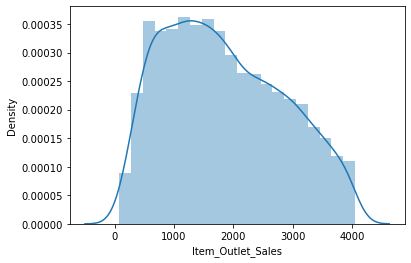

In [1078]:
sns.distplot(df_x['Item_Outlet_Sales']) #visualize it by using distplot

<AxesSubplot:>

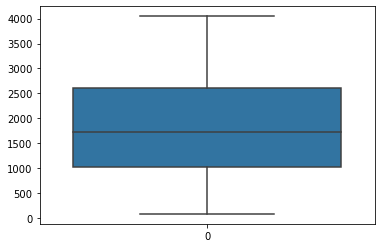

In [1079]:
sns.boxplot(data = df_x['Item_Outlet_Sales']) #visualize it by using boxplot

In [1080]:
#Find the mean, std, median and mode of the Column 'Item_Outlet_Sales'
Item_Outlet_Sales_mean = df_x.Item_Outlet_Sales.mean()
print('Mean of the Column "Item_Outlet_Sales" is ------>', Item_Outlet_Sales_mean)
Item_Outlet_Sales_std = df_x.Item_Outlet_Sales.std()
print('Std of the Column "Item_Outlet_Sales" is ------>', Item_Outlet_Sales_std)
Item_Outlet_Sales_median = df_x.Item_Outlet_Sales.median()
print('Median of the Column "Item_Outlet_Sales" is ------>', Item_Outlet_Sales_median)
Item_Outlet_Sales_mode = st.mode(df_x['Item_Outlet_Sales'])
print('Mode of the Column "Item_Outlet_Sales" is ------->', Item_Outlet_Sales_mode)

Mean of the Column "Item_Outlet_Sales" is ------> 1844.3341908064479
Std of the Column "Item_Outlet_Sales" is ------> 999.580302931219
Median of the Column "Item_Outlet_Sales" is ------> 1720.7601
Mode of the Column "Item_Outlet_Sales" is -------> 1438.128


In [1081]:
df_x.shape #now, check the shape of the dataset

(3720, 10)

In [1094]:
#split x and y
x = df_x.drop(['Item_Outlet_Sales'], axis=1)
y=df_x.Item_Outlet_Sales

In [1095]:
x.shape

(3720, 9)

In [1096]:
y.shape

(3720,)

In [1097]:
#scale the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.37095489, -0.56709406, -1.2173401 , ..., -0.25803184,
        -1.12500066, -0.51006137],
       [-1.70377652,  1.20418209, -1.12289567, ..., -0.25803184,
         1.10224918,  1.96054839],
       [-0.23887547, -0.56709406, -1.19650466, ..., -0.25803184,
        -1.12500066, -0.51006137],
       ...,
       [-0.89480131, -0.56709406, -0.02656395, ..., -1.59490987,
         1.10224918, -0.51006137],
       [ 1.27218332, -0.56709406, -0.65787968, ...,  1.0788462 ,
        -0.01137574, -0.51006137],
       [-1.61389038, -0.56709406, -0.37456791, ...,  1.0788462 ,
        -1.12500066, -0.51006137]])

In [1099]:
# Check the multicollinearity between the features
#import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"]= [ variance_inflation_factor(x_scaled, i)
               for i in range ( x_scaled.shape[1])]
vif['features']= x.columns
vif #same have less correlationa dn some have high

,vif,features
0,1.017730,Item_Identifier
1,1.025194,Item_Fat_Content
2,1.008322,Item_Visibility
3,1.014007,Item_Type
4,1.002962,Item_MRP
5,6.401475,Outlet_Establishment_Year
6,3.881315,Outlet_Size
7,2.566050,Outlet_Location_Type
8,5.738894,Outlet_Type


# Now, come to the Test data

In [1548]:
df_y = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')
df_y.head() #read the csv file first

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [1549]:
df_y.shape #check the shape of the dataset

(5681, 11)

In [1550]:
df_y.describe() #describe the column

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [1551]:
df_y.info() #check the missing values and type of the column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


# Column1: Item_Identifier

In [1552]:
df_y['Item_Identifier'].unique() #check the unique values

array(['FDW58', 'FDW14', 'NCN55', ..., 'NCI29', 'FDP28', 'FDF04'],
      dtype=object)

In [1553]:
df_y['Item_Identifier'].value_counts() #check the number of counts

FDW10    8
FDN52    8
FDZ50    8
FDQ60    8
FDP15    8
        ..
NCI54    1
FDU23    1
DRP35    1
FDG09    1
DRF27    1
Name: Item_Identifier, Length: 1543, dtype: int64

In [1554]:
lab_enc = LabelEncoder() #using label encoder to convert object into integer

In [1555]:
df_iden = lab_enc.fit_transform(df_y['Item_Identifier'])

In [1556]:
a=pd.Series(df_iden)

In [1557]:
df_y['Item_Identifier']=a #save the values into our column

In [1558]:
df_y['Item_Identifier'].unique() #now, check the unique value

array([1103, 1067, 1406, ..., 1332,  745,  356])

In [1559]:
df_y['Item_Identifier'].value_counts() #check the number of counts

680     8
573     8
45      8
1242    8
734     8
       ..
1193    1
1368    1
1372    1
1424    1
766     1
Name: Item_Identifier, Length: 1543, dtype: int64

In [1560]:
df_y['Item_Identifier'].all() #check the value of zero in our column

False

In [1561]:
df_y['Item_Identifier'] = df_y['Item_Identifier'].replace(0,df_y['Item_Identifier'].mean())
#replace the zero value by its column mean

In [1562]:
df_y['Item_Identifier'].all() #now, check the zero value

True

In [1563]:
df_y['Item_Identifier'].isna().sum() #check the null value 

0

<AxesSubplot:>

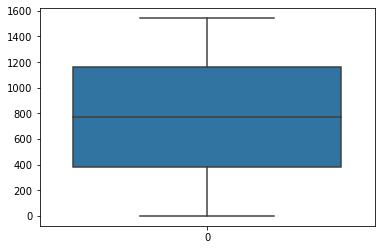

In [1564]:
sns.boxplot(data = df_y['Item_Identifier']) #visualize it by using boxplot

<AxesSubplot:xlabel='Item_Identifier', ylabel='Density'>

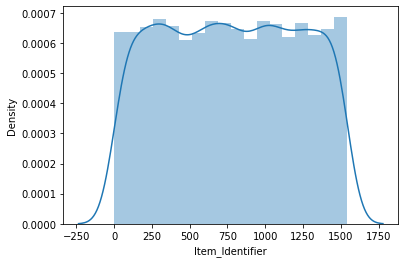

In [1565]:
sns.distplot(df_y['Item_Identifier']) #visualize it by using distplot

In [1566]:
# calculate the mean, median, mode to check how much our column is skewed  
print('mean of the column-------> ',df_y['Item_Identifier'].mean())
print('median of the column--------> ',df_y['Item_Identifier'].median())
print('mode of the column--------> ', st.mode(df_y['Item_Identifier']))

mean of the column------->  773.7947824550106
median of the column-------->  772.0
mode of the column-------->  1470.0


In [1567]:
df_y.shape #now, check the shape of the dataset

(5681, 11)

# Column2: Item_Weight

In [1568]:
df_y.drop(columns = 'Item_Weight', inplace = True) #we have delete this column in training data

In [1569]:
df_y.shape #now, check the shape of the column

(5681, 10)

# Column3: Item_Fat_Content

In [1570]:
df_y['Item_Fat_Content'].unique() #check the unique values

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [1571]:
lab_enc = LabelEncoder() #using label encoder to convert object into integer

In [1572]:
df_fc = lab_enc.fit_transform(df_y['Item_Fat_Content'])

In [1573]:
b = pd.Series(df_fc)

In [1574]:
df_y['Item_Fat_Content'] = b #save values into our column

In [1575]:
df_y['Item_Fat_Content'].unique() #check the unique values

array([1, 4, 2, 0, 3])

In [1576]:
df_y['Item_Fat_Content'].value_counts() #check the number of counts

1    3396
2    1935
0     206
4      78
3      66
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:>

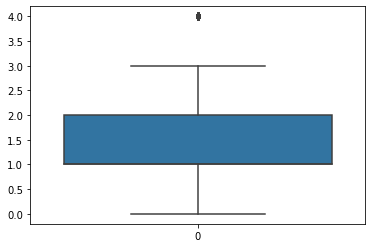

In [1577]:
sns.boxplot(data = df_y['Item_Fat_Content']) #visualize by using boxplot

In [1578]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df_y['Item_Fat_Content'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df_y['Item_Fat_Content'], 75,
                   interpolation = 'midpoint')
iqr = q3 - q1

In [1579]:
# higher side 
higher_side = df_y['Item_Fat_Content'] >= (q3+1.5*iqr)
print("Higher:", higher_side)
print(np.where(higher_side))
high = np.where(higher_side)
 
# lower side 
lower_side = df_y['Item_Fat_Content'] <= (q1-1.5*iqr)
print("Lower:", lower_side)
low = np.where(lower_side)
print(np.where(lower_side))
print("old Shape: ", df_y.shape)

Higher: 0       False
1        True
2       False
3       False
4       False
        ...  
5676    False
5677    False
5678    False
5679    False
5680    False
Name: Item_Fat_Content, Length: 5681, dtype: bool
(array([   1,  103,  242,  369,  499,  595,  739,  783,  797,  815,  985,
        996, 1025, 1037, 1105, 1143, 1256, 1284, 1314, 1321, 1422, 1437,
       1539, 1757, 1780, 1853, 1927, 2070, 2167, 2271, 2275, 2365, 2595,
       2798, 2866, 2915, 2926, 3039, 3077, 3097, 3357, 3362, 3461, 3565,
       3622, 3744, 3778, 3783, 3950, 4021, 4133, 4146, 4148, 4232, 4330,
       4334, 4340, 4352, 4478, 4542, 4616, 4692, 4726, 4845, 4870, 4921,
       4941, 4965, 4970, 5132, 5154, 5168, 5323, 5328, 5429, 5447, 5542,
       5671], dtype=int64),)
Lower: 0       False
1       False
2       False
3       False
4       False
        ...  
5676    False
5677    False
5678    False
5679    False
5680    False
Name: Item_Fat_Content, Length: 5681, dtype: bool
(array([], dtype=int64),)
old Shape:

In [1580]:
#removing the outliers
print("Old Shape: ", df_y.shape)
df_y = df_y.drop(df_y.index[high])
df_y = df_y.drop(df_y.index[low])
 
print("New Shape: ", df_y.shape)

Old Shape:  (5681, 10)
New Shape:  (5603, 10)


<AxesSubplot:>

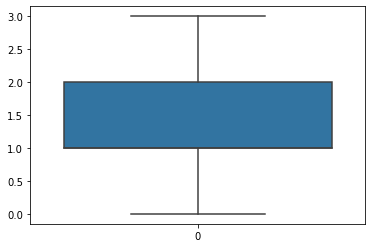

In [1581]:
sns.boxplot(data = df_y['Item_Fat_Content'] ) #visualize by using boxplot

In [1582]:
# calculate the mean, median, mode to check how much our column is skewed  
print('mean of the column-------> ',df_y['Item_Fat_Content'].mean())
print('median of the column--------> ',df_y['Item_Fat_Content'].median())
print('mode of the column--------> ', st.mode(df_y['Item_Fat_Content']))

mean of the column------->  1.3321434945564876
median of the column-------->  1.0
mode of the column-------->  1


In [1583]:
df_y.shape #now, check the shape of our dataset

(5603, 10)

# column4: Item_Visibility

In [1584]:
df_y['Item_Visibility'].unique() #check the unique values

array([0.00756484, 0.09957491, 0.01538839, ..., 0.1429909 , 0.07352856,
       0.10472015])

In [1585]:
df_y['Item_Visibility'].value_counts() #check the number of counts

0.000000    350
0.026711      2
0.060091      2
0.077011      2
0.093531      2
           ... 
0.062538      1
0.078021      1
0.041908      1
0.015941      1
0.042629      1
Name: Item_Visibility, Length: 5202, dtype: int64

In [1586]:
df_y['Item_Visibility'].all() #check the zero values in our column

False

In [1587]:
#Replace the zero value by its column mean
df_y['Item_Visibility'] = df_y['Item_Visibility'].replace(0, df_y['Item_Visibility'].mean())

In [1588]:
df_y['Item_Visibility'].all() #Now, check the zeros present in our column or not

True

<AxesSubplot:>

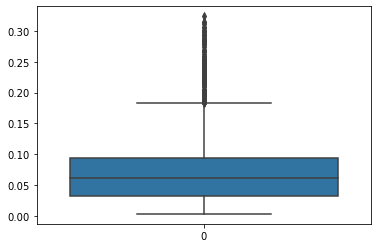

In [1589]:
sns.boxplot( data = df_y['Item_Visibility']) #visualize it by using boxplot

In [1590]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df_y['Item_Visibility'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df_y['Item_Visibility'], 65,
                   interpolation = 'midpoint')
iqr = q3 - q1

In [1591]:
# higher side 
higher_side = df_y['Item_Visibility'] >= (q3+1.5*iqr)
print("Higher: \n", higher_side)
print(np.where(higher_side))
high = np.where(higher_side)
 
# lower side 
lower_side = df_y['Item_Visibility'] <= (q1-1.5*iqr)
print("Lower: \n", lower_side)
low = np.where(lower_side)
print(np.where(lower_side))
print("old Shape: ", df_y.shape)

Higher: 
 0       False
2       False
3       False
4       False
5       False
        ...  
5676    False
5677     True
5678    False
5679    False
5680    False
Name: Item_Visibility, Length: 5603, dtype: bool
(array([  11,   18,   20,   41,   45,   75,   76,   77,   87,   88,  102,
        112,  132,  136,  139,  153,  158,  170,  174,  194,  223,  229,
        260,  273,  274,  275,  299,  302,  330,  334,  349,  357,  358,
        363,  381,  385,  399,  415,  422,  425,  433,  448,  451,  469,
        470,  474,  479,  490,  505,  514,  515,  522,  528,  536,  538,
        571,  574,  578,  602,  630,  631,  634,  656,  667,  679,  688,
        708,  711,  715,  717,  758,  762,  778,  781,  813,  837,  848,
        861,  870,  876,  878,  902,  923,  928,  938,  953,  957,  959,
        960,  976,  983, 1004, 1009, 1017, 1028, 1032, 1055, 1066, 1069,
       1076, 1079, 1093, 1128, 1159, 1165, 1175, 1179, 1188, 1211, 1215,
       1229, 1250, 1253, 1268, 1275, 1288, 1348, 1357, 1

In [1592]:
#removing the outliers
print("Old Shape: ", df_y.shape)
df_y = df_y.drop(df_y.index[high])
df_y = df_y.drop(df_y.index[low])
 
print("New Shape: ", df_y.shape)

Old Shape:  (5603, 10)
New Shape:  (5093, 10)


<AxesSubplot:>

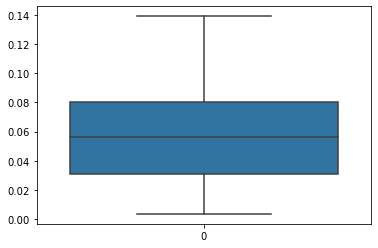

In [1593]:
sns.boxplot(data = df_y['Item_Visibility']) #visualize it by using boxplot

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

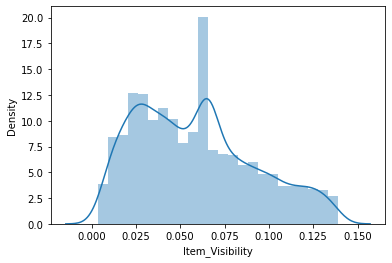

In [1594]:
sns.distplot(df_y['Item_Visibility']) #visualize it by using distplot

In [1595]:
# calculate the mean, median, mode to check how much our column is skewed  
print('mean of the column-------> ',df_y['Item_Visibility'].mean())
print('median of the column--------> ',df_y['Item_Visibility'].median())
print('mode of the column--------> ', st.mode(df_y['Item_Visibility']))

mean of the column------->  0.058848299587788505
median of the column-------->  0.056077341
mode of the column-------->  0.06559950108459743


In [1596]:
df_y.shape #check the present shape of our dataset

(5093, 10)

# Column5: Item_Type

In [1597]:
df_y['Item_Type'].unique() #check the unique value

array(['Snack Foods', 'Others', 'Dairy', 'Fruits and Vegetables',
       'Baking Goods', 'Breads', 'Hard Drinks', 'Seafood', 'Soft Drinks',
       'Household', 'Frozen Foods', 'Meat', 'Canned',
       'Health and Hygiene', 'Starchy Foods', 'Breakfast'], dtype=object)

In [1598]:
df_y['Item_Type'].value_counts() #check the number of counts

Snack Foods              708
Fruits and Vegetables    697
Household                597
Frozen Foods             509
Baking Goods             407
Dairy                    397
Canned                   373
Health and Hygiene       309
Meat                     276
Soft Drinks              244
Breads                   142
Hard Drinks              134
Starchy Foods            107
Others                   106
Breakfast                 64
Seafood                   23
Name: Item_Type, dtype: int64

In [1600]:
lab_enc = LabelEncoder() #using label encoder to convert object value into integer

In [1601]:
df_item = lab_enc.fit_transform(df_y['Item_Type'])

In [1604]:
a = pd.Series(df_item) 

In [1605]:
df_y['Item_Type'] = a # save it to our column

In [1606]:
df_y['Item_Type'].unique() #now, check the unique values

array([13.,  4.,  6.,  0.,  1., 12., 14.,  9.,  5., 10.,  3., 11.,  8.,
        7., 15.,  2., nan])

In [1607]:
df_y['Item_Type'].isna().sum() #check the null values

528

In [1609]:
df_y['Item_Type'].value_counts() #check the number of counts

6.0     624
13.0    620
9.0     546
5.0     458
0.0     372
4.0     362
3.0     335
8.0     272
10.0    246
14.0    220
1.0     126
7.0     119
15.0     97
11.0     88
2.0      60
12.0     20
Name: Item_Type, dtype: int64

In [1610]:
#using simple imputer to treat the null values
si = SimpleImputer()

In [1611]:
ct = make_column_transformer((si,['Item_Type']), remainder = 'passthrough')
a = ct.fit_transform(df_y)

In [1612]:
df_y['Item_Type'] = a #save it to our column

In [1613]:
df_y['Item_Type'].isna().sum() #now, check the null value

0

In [1614]:
df_y['Item_Type'].value_counts() #these null values replaced by column mean value.

6.000000     624
13.000000    620
9.000000     546
7.211172     528
5.000000     458
0.000000     372
4.000000     362
3.000000     335
8.000000     272
10.000000    246
14.000000    220
1.000000     126
7.000000     119
15.000000     97
11.000000     88
2.000000      60
12.000000     20
Name: Item_Type, dtype: int64

<AxesSubplot:xlabel='Item_Type', ylabel='Density'>

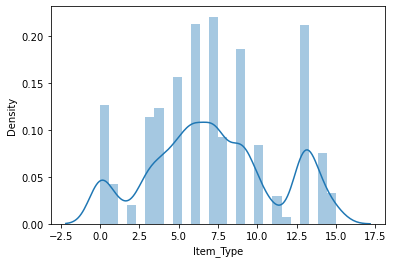

In [1615]:
sns.distplot(df_y['Item_Type']) #visualize it by using distplot

In [1616]:
# calculate the mean, median, mode to check how much our column is skewed  
print('mean of the column-------> ',df_y['Item_Type'].mean())
print('median of the column--------> ',df_y['Item_Type'].median())
print('mode of the column--------> ', st.mode(df_y['Item_Type']))

mean of the column------->  7.211171960569318
median of the column-------->  7.211171960569551
mode of the column-------->  6.0


In [1618]:
df_y.shape #now check the shape of the dataset

(5093, 10)

# Column6: Item_MRP

In [1619]:
df_y['Item_MRP'].unique() #check the unique values

array([107.8622, 241.7538, 155.034 , ..., 141.3154, 214.6218,  79.796 ])

In [1620]:
df_y['Item_MRP'].value_counts() #check the number of counts

189.6214    4
141.2154    4
173.6422    4
99.4700     4
55.3588     4
           ..
176.3396    1
110.1254    1
212.3928    1
186.4240    1
185.3582    1
Name: Item_MRP, Length: 4050, dtype: int64

In [1621]:
df_y['Item_MRP'].all() #check the zero value in the column

True

In [1622]:
df_y['Item_MRP'].isna().sum() #check the null values of the column

0

<AxesSubplot:>

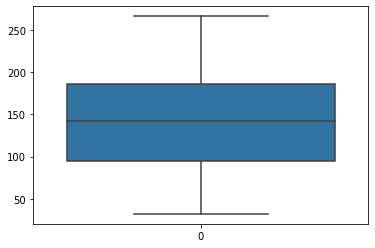

In [1623]:
sns.boxplot(data = df_y['Item_MRP']) # visualize it by using boxplot

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

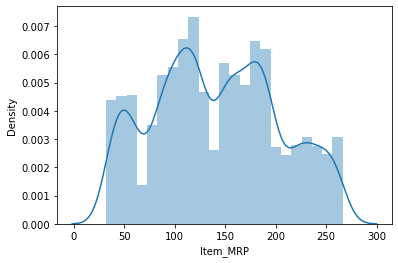

In [1624]:
sns.distplot(df_y['Item_MRP']) #visualize it by using distplot

In [1625]:
# calculate the mean, median, mode to check how much our column is skewed  
print('mean of the column-------> ',df_y['Item_MRP'].mean())
print('median of the column--------> ',df_y['Item_MRP'].median())
print('mode of the column--------> ', st.mode(df_y['Item_MRP']))

mean of the column------->  141.39580137443542
median of the column-------->  141.9154
mode of the column-------->  194.9452


In [1626]:
df_y.shape

(5093, 10)

# Column7: Outlet_Identifier

In [1628]:
df_y.drop(columns = 'Outlet_Identifier', inplace = True) #we delete this column in our training data

In [1629]:
df_y.shape

(5093, 9)

# Column8: Outlet_Establishment_Year

In [1630]:
df_y['Outlet_Establishment_Year'].unique() #check the unique values

array([1999, 1998, 2007, 1985, 1997, 2009, 2002, 1987, 2004], dtype=int64)

In [1631]:
df_y['Outlet_Establishment_Year'].value_counts() #check the number of counts 

1985    819
1999    579
2009    574
2007    573
2002    572
1987    572
1997    570
2004    560
1998    274
Name: Outlet_Establishment_Year, dtype: int64

In [1633]:
df_y['Outlet_Establishment_Year'].isna().sum() #check the null values

0

In [1634]:
df_y['Outlet_Establishment_Year'].all() #check the zero value 

True

<AxesSubplot:>

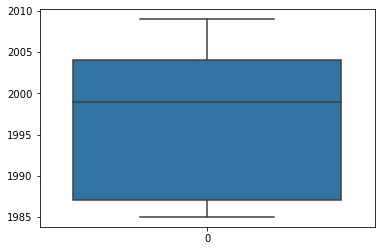

In [1635]:
sns.boxplot(data = df_y['Outlet_Establishment_Year']) #visualize the column by using boxplot

In [1637]:
# calculate the mean, median, mode to check how much our column is skewed  
print('mean of the column-------> ',df_y['Outlet_Establishment_Year'].mean())
print('median of the column--------> ',df_y['Outlet_Establishment_Year'].median())
print('mode of the column--------> ', st.mode(df_y['Outlet_Establishment_Year']))

mean of the column------->  1998.037109758492
median of the column-------->  1999.0
mode of the column-------->  1985


In [1638]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df_y['Outlet_Establishment_Year'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df_y['Outlet_Establishment_Year'], 75,
                   interpolation = 'midpoint')
iqr = q3 - q1

In [1639]:
# higher side 
higher_side = df_y['Outlet_Establishment_Year'] >= (q3+1.5*iqr)
print("Higher: \n", higher_side)
print(np.where(higher_side))
high = np.where(higher_side)
 
# lower side 
lower_side = df_y['Outlet_Establishment_Year'] <= (q1-1.5*iqr)
print("Lower: \n", lower_side)
low = np.where(lower_side)
print(np.where(lower_side))
print("old Shape: ", df_y.shape)

Higher: 
 0       False
2       False
3       False
4       False
5       False
        ...  
5675    False
5676    False
5678    False
5679    False
5680    False
Name: Outlet_Establishment_Year, Length: 5093, dtype: bool
(array([], dtype=int64),)
Lower: 
 0       False
2       False
3       False
4       False
5       False
        ...  
5675    False
5676    False
5678    False
5679    False
5680    False
Name: Outlet_Establishment_Year, Length: 5093, dtype: bool
(array([], dtype=int64),)
old Shape:  (5093, 9)


In [1640]:
#removing the outliers
print("Old Shape: ", df_y.shape)
df_y = df_y.drop(df_y.index[high])
df_y = df_y.drop(df_y.index[low])
 
print("New Shape: ", df_y.shape)

Old Shape:  (5093, 9)
New Shape:  (5093, 9)


In [1636]:
df_y.shape

(5093, 9)

# Column9: Outlet_Size

In [1641]:
df_y['Outlet_Size'].unique() #check the unique values

array(['Medium', nan, 'Small', 'High'], dtype=object)

In [1642]:
df_y['Outlet_Size'].isna().sum() #check the null values

1419

In [1643]:
lab_enc = LabelEncoder() #using label encoder to convert object into integer

In [1644]:
df_size = lab_enc.fit_transform(df_y['Outlet_Size'])

In [1645]:
a = pd.Series(df_size)

In [1646]:
df_y['Outlet_Size'] = a #save it into our column

In [1647]:
df_y['Outlet_Size'].unique() # check the unique values now

array([ 1.,  3.,  2.,  0., nan])

In [1648]:
df_y['Outlet_Size'].isna().sum() #check the null values

528

In [1649]:
df_y.fillna(value = df_y['Outlet_Size'].mean(), inplace = True) #fill null values by its mean

In [1652]:
df_y['Outlet_Size'].unique() #check the unique value again

array([1.        , 3.        , 2.        , 0.        , 1.70887185])

<AxesSubplot:xlabel='Outlet_Size', ylabel='Count'>

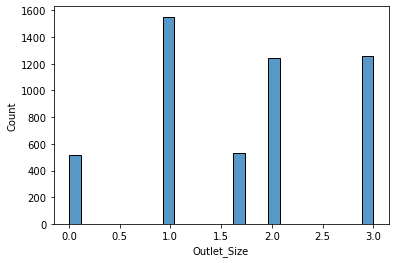

In [1653]:
sns.histplot(df_y['Outlet_Size']) #visualize it by histogram

<AxesSubplot:>

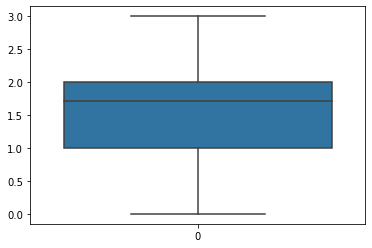

In [1655]:
sns.boxplot(data = df_y['Outlet_Size']) #visualize it by using boxplot

In [1656]:
# calculate the mean, median, mode to check how much our column is skewed  
print('mean of the column-------> ',df_y['Outlet_Size'].mean())
print('median of the column--------> ',df_y['Outlet_Size'].median())
print('mode of the column--------> ', st.mode(df_y['Outlet_Size']))

mean of the column------->  1.7088718510405112
median of the column-------->  1.7088718510405256
mode of the column-------->  1.0


In [1657]:
df_y.shape

(5093, 9)

# Column10: Outlet_Location_Type

In [1658]:
df_y['Outlet_Location_Type'].unique() #check the unique values 

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [1659]:
lab_enc = LabelEncoder() #using the label encoder to change object into integer

In [1660]:
df_loc = lab_enc.fit_transform(df_y['Outlet_Location_Type'])

In [1661]:
df_y['Outlet_Location_Type'] = df_loc #save it to our column

In [1662]:
df_y['Outlet_Location_Type'].unique() #check the unique values now

array([0, 2, 1])

In [1663]:
df_y['Outlet_Location_Type'].isna().sum() #check the null values

0

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Density'>

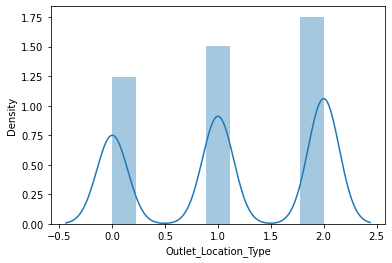

In [1664]:
sns.distplot(df_y['Outlet_Location_Type']) #visualize it by using distplot

In [1665]:
df_y.shape

(5093, 9)

# Column11: Outlet_Type

In [1666]:
df_y['Outlet_Type'].unique() #check the unique values 

array(['Supermarket Type1', 'Grocery Store', 'Supermarket Type3',
       'Supermarket Type2'], dtype=object)

In [1667]:
df_y['Outlet_Type'].value_counts() #count the number of values

Supermarket Type1    3426
Supermarket Type2     574
Supermarket Type3     564
Grocery Store         529
Name: Outlet_Type, dtype: int64

In [1669]:
lab_enc = LabelEncoder() #using label encoder change object into integer

In [1670]:
df_ot1 = lab_enc.fit_transform(df_y['Outlet_Type'])

In [1671]:
df_y['Outlet_Type'] = df_ot1

In [1672]:
df_y['Outlet_Type'].unique() #check the unique value again

array([1, 0, 3, 2])

In [1673]:
df_y['Outlet_Type'].value_counts() #count the number of values

1    3426
2     574
3     564
0     529
Name: Outlet_Type, dtype: int64

In [1674]:
df_y.shape

(5093, 9)

In [1676]:
df_x.head(2)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,145,1,0.016047,4.0,249.8092,1999,1,0,0,3735.1380
1,8,2,0.019278,14.0,48.2692,2009,1,2,1,443.4228


In [1677]:
df_y.head(2)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103.0,1,0.007565,13.0,107.8622,1999,1.0,0,1
2,1406.0,1,0.099575,13.0,241.7538,1998,3.0,2,0
